<a href="https://colab.research.google.com/github/paulaassisb/portfolio_awari/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_%E2%80%94_Bestsellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
## Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [153]:
#Importar o arquivo CSV para dentro de um dataframe.
url = "https://raw.githubusercontent.com/paulaassisb/portfolio_awari/main/Portfolio%201/bestsellers%20with%20categories%20(1).csv"
df = pd.read_csv(url)

In [154]:
#Imprimir o cabeçalho do dataframe
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [155]:
#Verificar se há dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [156]:
pd.DataFrame({'tipos':df.dtypes, 'missing':df.isna().sum()})

,tipos,missing
Name,object,0
Author,object,0
User Rating,float64,0
Reviews,int64,0
Price,int64,0
Year,int64,0
Genre,object,0


In [157]:
#Estatísticas descritivas que resumem a distribuição de um conjunto de dados
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [158]:
df = pd.get_dummies(df, columns=['Genre'])

In [159]:
df = df.drop(columns=['Genre_Non Fiction'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre_Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,0


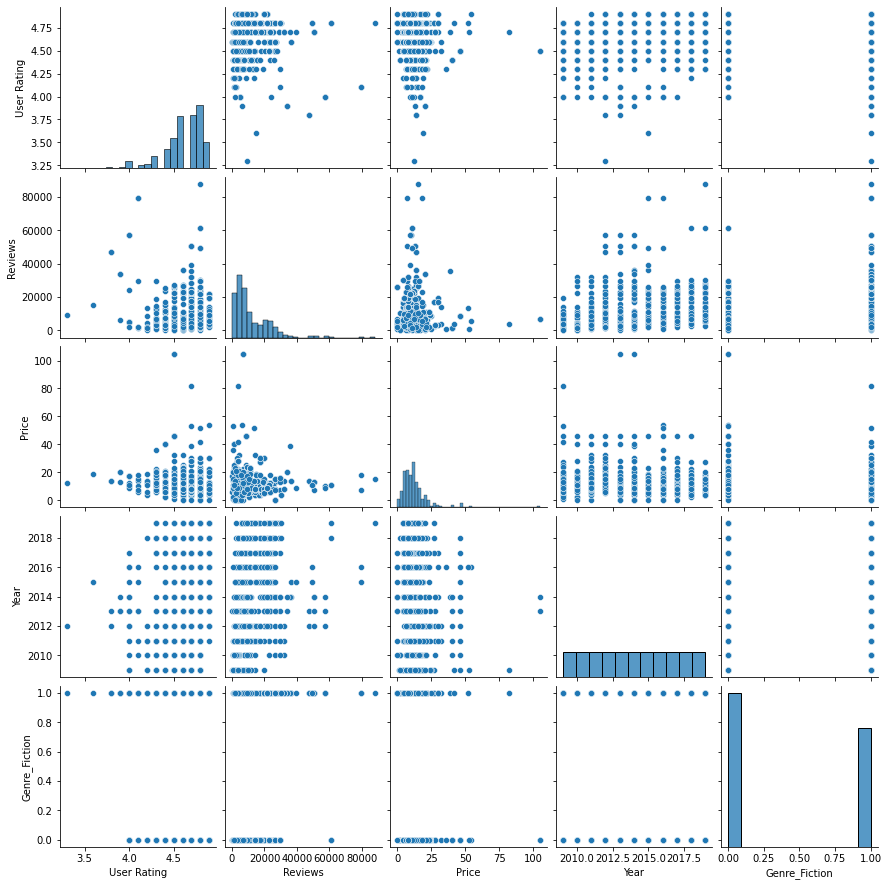

In [160]:
sns.pairplot(df)

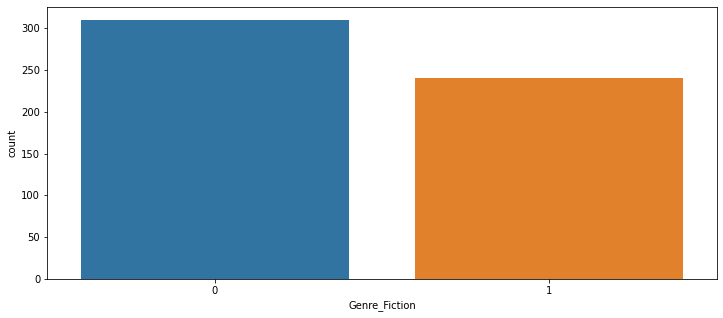

In [161]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="Genre_Fiction", data=df)

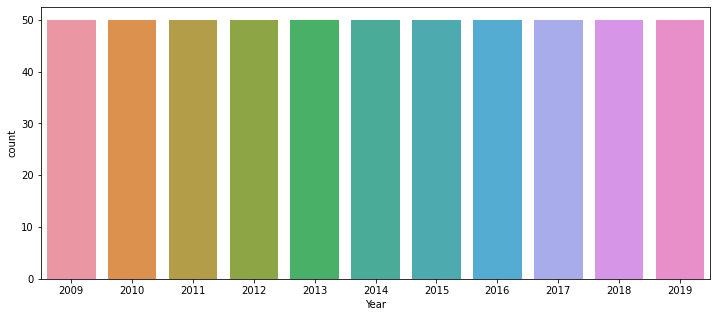

In [162]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="Year", data=df)

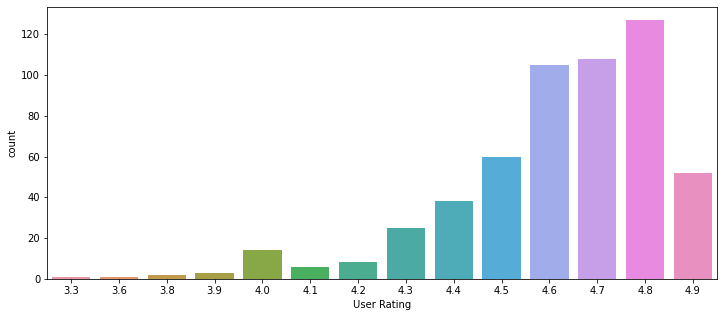

In [163]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="User Rating", data=df)

In [165]:
fig = px.histogram(df, x="Reviews",labels={'':'The Number of Books'},title="Reviews Histogram")
fig.show()

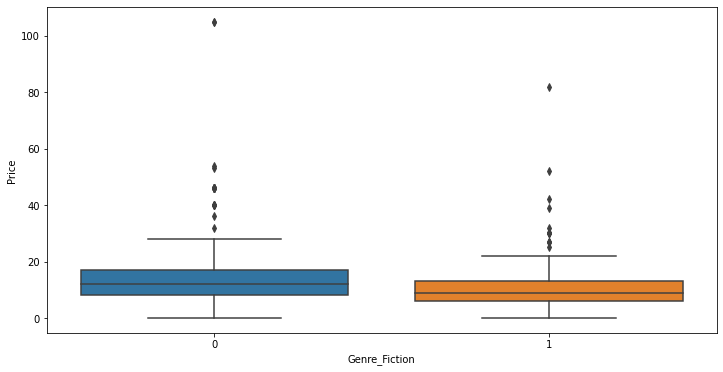

In [175]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre_Fiction', y='Price', data=df)

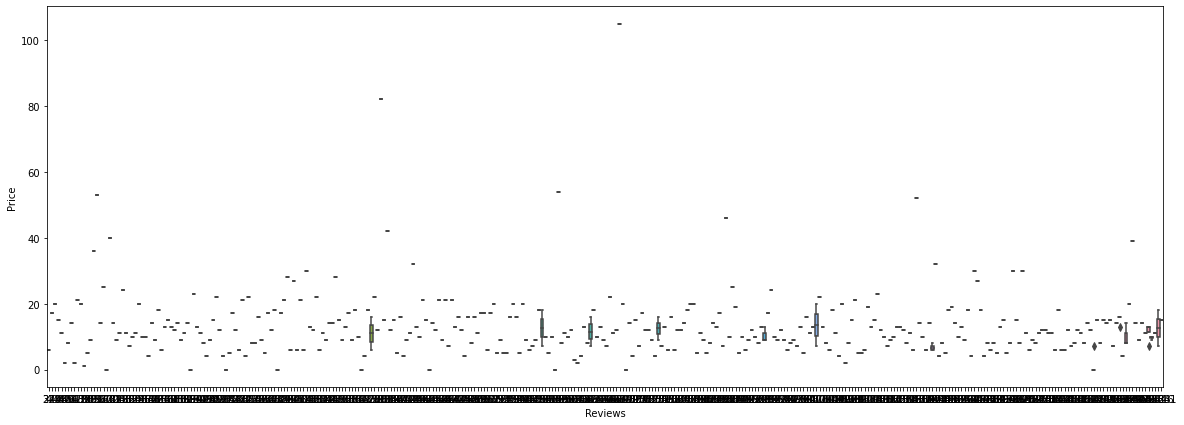

In [178]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='Reviews', y='Price', data=df)

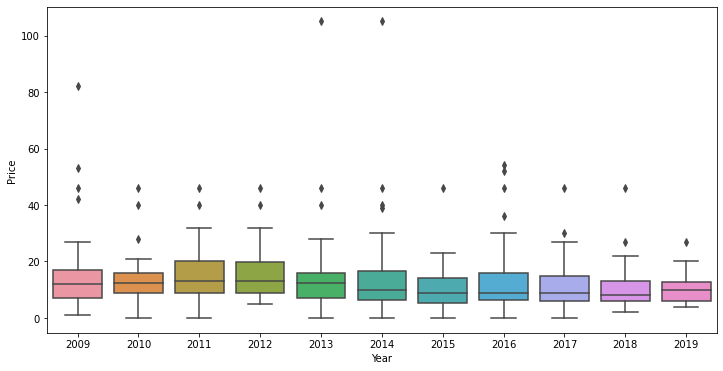

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price', data=df)

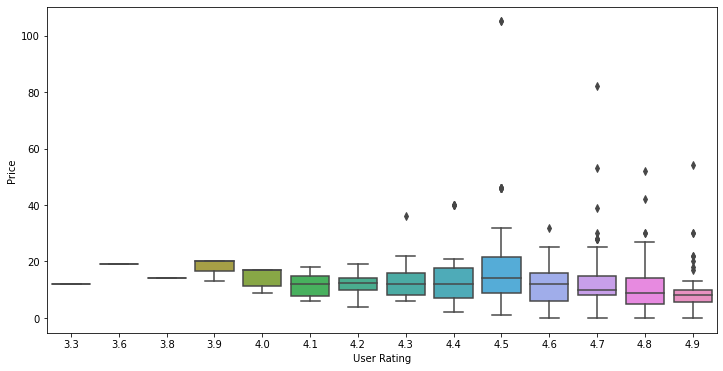

In [171]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='User Rating', y='Price', data=df)

In [181]:
df.info('Name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           550 non-null    object 
 1   Author         550 non-null    object 
 2   User Rating    550 non-null    float64
 3   Reviews        550 non-null    int64  
 4   Price          550 non-null    int64  
 5   Year           550 non-null    int64  
 6   Genre_Fiction  550 non-null    uint8  
dtypes: float64(1), int64(3), object(2), uint8(1)
memory usage: 26.4+ KB


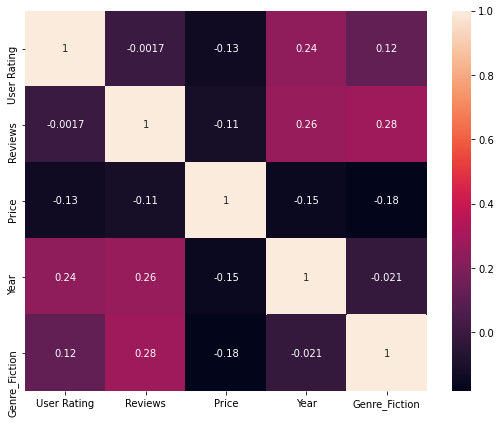

In [188]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True)